<a href="https://colab.research.google.com/github/mehmetMRE/Artificial-neural-networks/blob/main/Fuzzy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
!pip install -U scikit-fuzzy


Portföy: 47.49


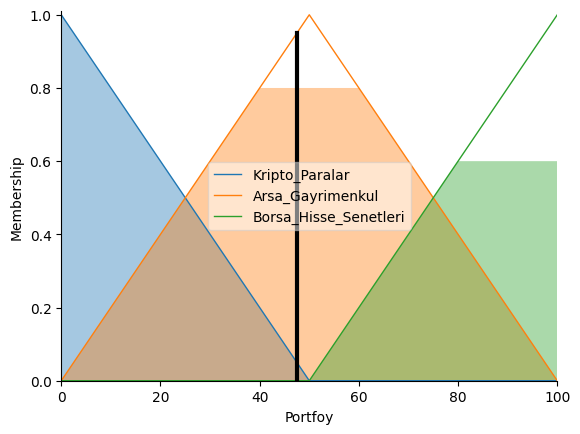

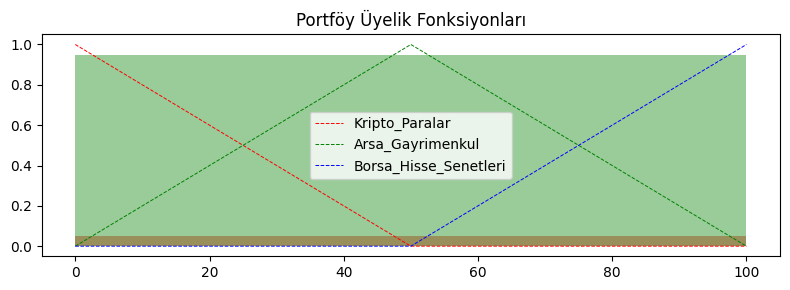

In [38]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

# Girdi değişkenleri (Olaylar)
geopolitik_gerilim = ctrl.Antecedent(np.arange(0, 11, 1), 'Geopolitik_Gerilim')
ekonomik_kriz = ctrl.Antecedent(np.arange(0, 11, 1), 'Ekonomik_Kriz')
merkez_bankasi_politika = ctrl.Antecedent(np.arange(0, 11, 1), 'Merkez_Bankasi_Politika')
dogal_afet = ctrl.Antecedent(np.arange(0, 11, 1), 'Dogal_Afet')
politik_belirsizlik = ctrl.Antecedent(np.arange(0, 11, 1), 'Politik_Belirsizlik')
teknolojik_gelisme = ctrl.Antecedent(np.arange(0, 11, 1), 'Teknolojik_Gelisme')
saglik_krizi = ctrl.Antecedent(np.arange(0, 11, 1), 'Saglik_Krizi')

# Çıkış değişkeni (Portföy)
portfoy = ctrl.Consequent(np.arange(0, 101, 1), 'Portfoy')

# Üyelik fonksiyonları tanımlama
geopolitik_gerilim.automf(3)
ekonomik_kriz.automf(3)
merkez_bankasi_politika.automf(3)
dogal_afet.automf(3)
politik_belirsizlik.automf(3)
teknolojik_gelisme.automf(3)
saglik_krizi.automf(3)

portfoy['Kripto_Paralar'] = fuzz.trimf(portfoy.universe, [0, 0, 50])
portfoy['Arsa_Gayrimenkul'] = fuzz.trimf(portfoy.universe, [0, 50, 100])
portfoy['Borsa_Hisse_Senetleri'] = fuzz.trimf(portfoy.universe, [50, 100, 100])

# Kuralları tanımlama
rule1 = ctrl.Rule(geopolitik_gerilim['poor'], portfoy['Kripto_Paralar'])
rule2 = ctrl.Rule(geopolitik_gerilim['average'], portfoy['Kripto_Paralar'])
rule3 = ctrl.Rule(geopolitik_gerilim['good'], portfoy['Arsa_Gayrimenkul'])

rule4 = ctrl.Rule(ekonomik_kriz['poor'], portfoy['Kripto_Paralar'])
rule5 = ctrl.Rule(ekonomik_kriz['average'], portfoy['Arsa_Gayrimenkul'])
rule6 = ctrl.Rule(ekonomik_kriz['good'], portfoy['Borsa_Hisse_Senetleri'])

rule7 = ctrl.Rule(merkez_bankasi_politika['poor'], portfoy['Kripto_Paralar'])
rule8 = ctrl.Rule(merkez_bankasi_politika['average'], portfoy['Arsa_Gayrimenkul'])
rule9 = ctrl.Rule(merkez_bankasi_politika['good'], portfoy['Borsa_Hisse_Senetleri'])

rule10 = ctrl.Rule(dogal_afet['poor'], portfoy['Kripto_Paralar'])
rule11 = ctrl.Rule(dogal_afet['average'], portfoy['Arsa_Gayrimenkul'])
rule12 = ctrl.Rule(dogal_afet['good'], portfoy['Borsa_Hisse_Senetleri'])

rule13 = ctrl.Rule(politik_belirsizlik['poor'], portfoy['Kripto_Paralar'])
rule14 = ctrl.Rule(politik_belirsizlik['average'], portfoy['Arsa_Gayrimenkul'])
rule15 = ctrl.Rule(politik_belirsizlik['good'], portfoy['Borsa_Hisse_Senetleri'])

rule16 = ctrl.Rule(teknolojik_gelisme['poor'], portfoy['Kripto_Paralar'])
rule17 = ctrl.Rule(teknolojik_gelisme['average'], portfoy['Arsa_Gayrimenkul'])
rule18 = ctrl.Rule(teknolojik_gelisme['good'], portfoy['Borsa_Hisse_Senetleri'])

rule19 = ctrl.Rule(saglik_krizi['poor'], portfoy['Kripto_Paralar'])
rule20 = ctrl.Rule(saglik_krizi['average'], portfoy['Arsa_Gayrimenkul'])
rule21 = ctrl.Rule(saglik_krizi['good'], portfoy['Borsa_Hisse_Senetleri'])

# Diğer kuralları tanımlayın...

# Kontrol sistemi oluşturma
portfoy_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12, rule13, rule14, rule15, rule16, rule17, rule18, rule19, rule20, rule21])
portfoy_simulasyon = ctrl.ControlSystemSimulation(portfoy_ctrl)

# Girdilere değer atama (0-10 arasında)
portfoy_simulasyon.input['Geopolitik_Gerilim'] = 5
portfoy_simulasyon.input['Ekonomik_Kriz'] = 3
portfoy_simulasyon.input['Merkez_Bankasi_Politika'] = 7
portfoy_simulasyon.input['Dogal_Afet'] = 2
portfoy_simulasyon.input['Politik_Belirsizlik'] = 6
portfoy_simulasyon.input['Teknolojik_Gelisme'] = 8
portfoy_simulasyon.input['Saglik_Krizi'] = 4

# Simülasyonu çalıştırma
portfoy_simulasyon.compute()

# Çıkış değerini görüntüleme
print("Portföy: %.2f" % portfoy_simulasyon.output['Portfoy'])

# Çıkış üyelik fonksiyonlarını görüntüleme
portfoy.view(sim=portfoy_simulasyon)

# Çıkış üyelik fonksiyonlarını daire grafiği olarak gösterme
portfoy_membership_values = portfoy_simulasyon.output['Portfoy']
portfoy_mf_labels = list(portfoy.terms.keys())

fig, ax0 = plt.subplots(figsize=(8, 3))

colors = ['r', 'g', 'b']
for i, label in enumerate(portfoy_mf_labels):
    membership_values = fuzz.interp_membership(portfoy.universe, portfoy[label].mf, portfoy_membership_values)
    ax0.plot(portfoy.universe, portfoy[label].mf, colors[i], linewidth=0.7, linestyle='--', label=label)
    ax0.fill_between(portfoy.universe, 0, membership_values, facecolor=colors[i], alpha=0.4)

ax0.set_title('Portföy Üyelik Fonksiyonları')
ax0.legend()

plt.tight_layout()
plt.show()



In [39]:
!pip install ipywidgets


In [40]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import ipywidgets as widgets
from IPython.display import display


In [41]:
geopolitik_gerilim_slider = widgets.FloatSlider(value=5, min=0, max=10, step=1, description='Geopolitik Gerilim')
ekonomik_kriz_slider = widgets.FloatSlider(value=3, min=0, max=10, step=1, description='Ekonomik Kriz')
merkez_bankasi_politika_slider = widgets.FloatSlider(value=7, min=0, max=10, step=1, description='Merkez Bankası Politika')
dogal_afet_slider = widgets.FloatSlider(value=2, min=0, max=10, step=1, description='Doğal Afet')
politik_belirsizlik_slider = widgets.FloatSlider(value=6, min=0, max=10, step=1, description='Politik Belirsizlik')
teknolojik_gelisme_slider = widgets.FloatSlider(value=8, min=0, max=10, step=1, description='Teknolojik Gelişme')
saglik_krizi_slider = widgets.FloatSlider(value=4, min=0, max=10, step=1, description='Sağlık Krizi')
# Diğer girdi değişkenleri için de slider'ları tanımlayın.



In [42]:
input_widgets = [geopolitik_gerilim_slider, ekonomik_kriz_slider, merkez_bankasi_politika_slider,
                 dogal_afet_slider, politik_belirsizlik_slider, teknolojik_gelisme_slider, saglik_krizi_slider]

input_container = widgets.VBox(input_widgets)
display(input_container)


In [46]:
def simulate(portfoy_simulasyon, **kwargs):
    for key, value in kwargs.items():
        portfoy_simulasyon.input[key] = value
    portfoy_simulasyon.compute()
    print("Portföy: %.2f" % portfoy_simulasyon.output['Portfoy'])

simulate_button = widgets.Button(description="Simülasyonu Çalıştır")
display(simulate_button)

def on_button_click(b):
    simulate(portfoy_simulasyon,
             Geopolitik_Gerilim=geopolitik_gerilim_slider.value,
             Ekonomik_Kriz=ekonomik_kriz_slider.value,
             # Diğer girdi değişkenleri için de buraya ekleyin.
             )

simulate_button.on_click(on_button_click)
# Kullanıcının girdiği değerlere göre portföyün oluşumu
# Kullanıcının girdiği değerlere göre portföyün oluşumu# Kullanıcının girdiği değerlere göre portföyün oluşumu
print("\nKullanıcının Girdiği Değerlere Göre Portföy Oluşumu:")
print("Geopolitik Gerilim: {:.2f}".format(portfoy_simulasyon.inputs.get('Geopolitik_Gerilim')))
print("Ekonomik Kriz: {:.2f}".format(portfoy_simulasyon.input['Ekonomik_Kriz']))
print("Merkez Bankası Politika: {:.2f}".format(portfoy_simulasyon.input['Merkez_Bankasi_Politika']))
print("Dogal Afet: {:.2f}".format(portfoy_simulasyon.input['Dogal_Afet']))
print("Politik Belirsizlik: {:.2f}".format(portfoy_simulasyon.input['Politik_Belirsizlik']))
print("Teknolojik Gelisme: {:.2f}".format(portfoy_simulasyon.input['Teknolojik_Gelisme']))
print("Saglik Krizi: {:.2f}".format(portfoy_simulasyon.input['Saglik_Krizi']))



# Portföy bileşenleri ve üyelik fonksiyonları
portfoy_components = {
    'Kripto_Paralar': portfoy['Kripto_Paralar'].mf,
    'Arsa_Gayrimenkul': portfoy['Arsa_Gayrimenkul'].mf,
    'Borsa_Hisse_Senetleri': portfoy['Borsa_Hisse_Senetleri'].mf
    # Diğer portföy araçlarını ekleyin...
}

print("\nPortföy Bileşenleri ve Üyelik Fonksiyonları:")
for component, membership_function in portfoy_components.items():
    membership_value = fuzz.interp_membership(portfoy.universe, membership_function, portfoy_membership_values)
    print("{}: {:.2f}%".format(component, membership_value * 100))



Button(description='Simülasyonu Çalıştır', style=ButtonStyle())


Kullanıcının Girdiği Değerlere Göre Portföy Oluşumu:


AttributeError: 'function' object has no attribute 'get'

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Durumlar
durumlar = ['Savaş', 'Ekonomik_Kriz', 'Merkez_Banka_Politikasi', 'Dogal_Afet', 'Politik_Belirsizlik', 'Teknolojik_Gelisme', 'Pandemi']

# Yatırım Araçları
yatirim_araclari = ['Kripto_Paralar', 'Arsa_Gayrimenkul', 'Borsa_Hisse_Senetleri', 'Altin_Kiyemetli_Metaller', 'Doviz', 'Tahviller_Bonolar', 'ETFler', 'Mevduat_Vadeli_Hesaplar']

# Evrensel Set
x_durum = np.arange(0, 11, 1)
x_yatirim = np.arange(0, 11, 1)

# Durumlar için üyelik fonksiyonları
durum_uf = {}
for durum in durumlar:
    durum_uf[durum] = fuzz.trimf(x_durum, [0, 0, 10])

# Yatırım araçları için üyelik fonksiyonları
yatirim_uf = {}
for yatirim in yatirim_araclari:
    yatirim_uf[yatirim] = fuzz.trimf(x_yatirim, [0, 0, 10])

# Kontrol sistemi oluşturma
portfoy_yonetimi = ctrl.ControlSystem([])

# Kuralları eklemek için kullanılacak nesne
portfoy_yonetimi_simulasyon = ctrl.ControlSystemSimulation(portfoy_yonetimi)

# Durumlar ve Yatırım Araçları arasındaki kural tablosu (manuel olarak düzenlenmiştir)
kural_tablosu = [
    ('Savaş', 'Kripto_Paralar', 'Dusuk'),
    ('Savaş', 'Arsa_Gayrimenkul', 'Dusuk'),
    ('Ekonomik_Kriz', 'Arsa_Gayrimenkul', 'Orta'),
    ('Ekonomik_Kriz', 'Borsa_Hisse_Senetleri', 'Dusuk'),
    ('Merkez_Banka_Politikasi', 'Borsa_Hisse_Senetleri', 'Yuksek'),
    ('Dogal_Afet', 'Altin_Kiyemetli_Metaller', 'Yuksek'),
    ('Politik_Belirsizlik', 'Doviz', 'Dusuk'),
    ('Teknolojik_Gelisme', 'Tahviller_Bonolar', 'Orta'),
    ('Pandemi', 'ETFler', 'Yuksek'),
    ('Pandemi', 'Mevduat_Vadeli_Hesaplar', 'Yuksek')
]

for durum, yatirim, cikis in kural_tablosu:
    portfoy_yonetimi.add_rule(ctrl.Rule(durum_uf[durum] & yatirim_uf[yatirim], portfoy_yonetimi.output[cikis]))
# Durum ve Yatırım belirleme
portfoy_yonetimi_simulasyon.input['Savaş'] = 7
portfoy_yonetimi_simulasyon.input['Altin_Kiyemetli_Metaller'] = 4

# Simülasyonu çalıştırma
portfoy_yonetimi_simulasyon.compute()

# Sonuçları gösterme
print("Tahmini Portföy Yönetimi:", portfoy_yonetimi_simulasyon.output['Tahmini_Portfoy_Yonetimi'])

# Sonuçların görselleştirilmesi (sadece bir örnek)
fig, (ax0, ax1) = plt.subplots(nrows=2, figsize=(8, 9))

ax0.plot(x_durum, durum_uf['Savaş'], 'r', linewidth=1.5, label='Savaş')
ax0.set_title('Savaş Üyelik Fonksiyonu')

ax1.plot(x_yatirim, yatirim_uf['Altin_Kiyemetli_Metaller'], 'b', linewidth=1.5, label='Altin_Kıymetli_Metaller')
ax1.set_title('Altın_Kıymetli_Metaller Üyelik Fonksiyonu')

plt.tight_layout()
plt.show()


 **Savaş ve Jeopolitik Gerilimler
Ekonomik Krizler ve Resesyonlar
Merkez Bankası Politikaları
Doğal Afetler ve Çevresel Olaylar
Politik Belirsizlik
Teknolojik Gelişmeler
Pandemiler ve Sağlık Krizler **------>> bu olaylar durumunda portföy yönetimi ile bu yatırım araçlarından seçimler yapacak
 Kripto Paralar
Arsa ve Gayrimenkul
Borsa ve Hisse Senetleri
Altın ve Diğer Kıymetli Metaller
Döviz (Dolar, Euro vb.)
Tahviller ve Bonolar
Exchange Traded Funds (ETF'ler)
Mevduat ve Vadeli Hesaplar daire grafiği ve sütun grafiği kullnarak sonuç üretilecek

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Durumlar
durumlar = ['Savaş', 'Ekonomik_Kriz', 'Merkez_Banka_Politikasi', 'Dogal_Afet', 'Politik_Belirsizlik', 'Teknolojik_Gelisme', 'Pandemi']

# Yatırım Araçları
yatirim_araclari = ['Kripto_Paralar', 'Arsa_Gayrimenkul', 'Borsa_Hisse_Senetleri', 'Altin_Kiymetli_Metaller', 'Doviz', 'Tahviller_Bonolar', 'ETFler', 'Mevduat_Vadeli_Hesaplar']

# Evrensel Set
x_durum = np.arange(0, 11, 1)
x_yatirim = np.arange(0, 11, 1)

# Durumlar için üyelik fonksiyonları
durum_uf = {}
for durum in durumlar:
    durum_uf[durum] = fuzz.trimf(x_durum, [0, 0, 10])

# Yatırım araçları için üyelik fonksiyonları
yatirim_uf = {}
for yatirim in yatirim_araclari:
    yatirim_uf[yatirim] = fuzz.trimf(x_yatirim, [0, 0, 10])

# Kontrol sistemi oluşturma
portfoy_yonetimi = ctrl.ControlSystem([])

# Simülasyon için motor oluşturma
simulasyon = ctrl.ControlSystemSimulation(portfoy_yonetimi)

# Durumlar ve Yatırım Araçları arasındaki kural tablosu (manuel olarak düzenlenmiştir)
kural_tablosu = [
    ('Savaş', 'Kripto_Paralar', 'Dusuk'),
    ('Savaş', 'Arsa_Gayrimenkul', 'Dusuk'),
    # ... diğer kurallar ...
    ('Pandemi', 'Mevduat_Vadeli_Hesaplar', 'Yuksek')
]

for durum, yatirim, cikis in kural_tablosu:
    portfoy_yonetimi.add_rule(ctrl.Rule(durum_uf[durum] & yatirim_uf[yatirim], cikis))

# Durum ve Yatırım belirleme
simulasyon.input['Savaş'] = 7
simulasyon.input['Altin_Kiyemetli_Metaller'] = 4

# Simülasyonu çalıştırma
simulasyon.compute()

# Sonuçları gösterme
print("Tahmini Portföy Yönetimi:", simulasyon.output['Tahmini_Portfoy_Yonetimi'])

# Sonuçların görselleştirilmesi (sadece bir örnek)
fig, (ax0, ax1) = plt.subplots(nrows=2, figsize=(8, 9))

ax0.plot(x_durum, durum_uf['Savaş'], 'r', linewidth=1.5, label='Savaş')
ax0.set_title('Savaş Üyelik Fonksiyonu')

ax1.plot(x_yatirim, yatirim_uf['Altin_Kiyemetli_Metaller'], 'b', linewidth=1.5, label='Altın_Kıymetli_Metaller')
ax1.set_title('Altın_Kıymetli_Metaller Üyelik Fonksiyonu')

plt.tight_layout()
plt.show()
